<a href="https://colab.research.google.com/github/pin94/statistics-hw/blob/main/Homework_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as stats

In [ ]:
myDirFiles='/content/drive/MyDrive/cust_seg.csv'
df=pd.read_csv(myDirFiles,delimiter=',')
df.head()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2


In [ ]:
# checking the data type and see if there's any null value
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


no null value found.

# Data Exploratory Analysis



Average usage from last year is: 63.174
Average usage before campaign is: 52.23
Average usage after campaign is: 58.0525


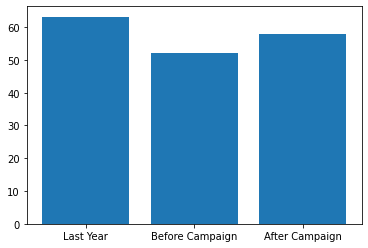

In [ ]:
# Finding the average difference in usage
x=['Last Year','Before Campaign','After Campaign']
y=[df.Latest_mon_usage.mean(),df.pre_usage.mean(),df.post_usage_2ndmonth.mean()]

plt.bar(x,y);

print(f'Average usage from last year is: {df.Latest_mon_usage.mean()}')
print(f'Average usage before campaign is: {df.pre_usage.mean()}')
print(f'Average usage after campaign is: {df.post_usage_2ndmonth.mean()}')

Standard deviation from last year is: 11.242137352892756
Standard deviation before campaign is: 10.25293682648241
Standard deviation after campaign is: 10.426444623525184


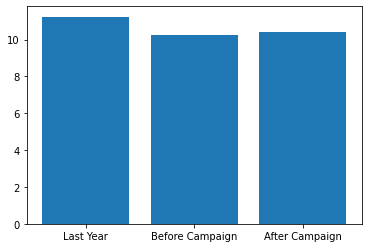

In [ ]:
# Finding the standard deviation difference in usage
x=['Last Year','Before Campaign','After Campaign']
y=[df.Latest_mon_usage.std(),df.pre_usage.std(),df.post_usage_2ndmonth.std()]

plt.bar(x,y);

print(f'Standard deviation from last year is: {df.Latest_mon_usage.std()}')
print(f'Standard deviation before campaign is: {df.pre_usage.std()}')
print(f'Standard deviation after campaign is: {df.post_usage_2ndmonth.std()}')

<ipython-input-36-5c751d8d6219>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df.groupby('sex')['pre_usage','post_usage_2ndmonth'].mean()


0: Male, 1: Female


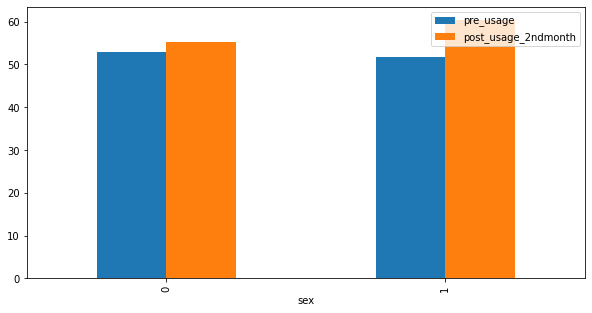

In [ ]:
# Grouping users by sex
df1=df.groupby('sex')['pre_usage','post_usage_2ndmonth'].mean()
df1.plot.bar(figsize=(10,5));
print('0: Male, 1: Female')

# Hypothesis Test

## Define H0 & H1 using significance level (α)=5%, and draw the conclusion.

* Null Hipotsesis (H0): Penggunaan campaign tidak berpengaruh terhadap peningkatan credit card usage.
* Alternatif Hipotesis (H1): Penggunaan campaign berpengaruh terhadap penurunan credit card usage. 
* Level signifikasi: 0,05
* p-value: 0.000 (pearson test), 0.000 (spearman test)
* Kesimpulan: p-value < level signifikasi artinya H0 tertolak. Maka H1 diterima, artinya berpengaruh terhadap penurunan credit card usage.

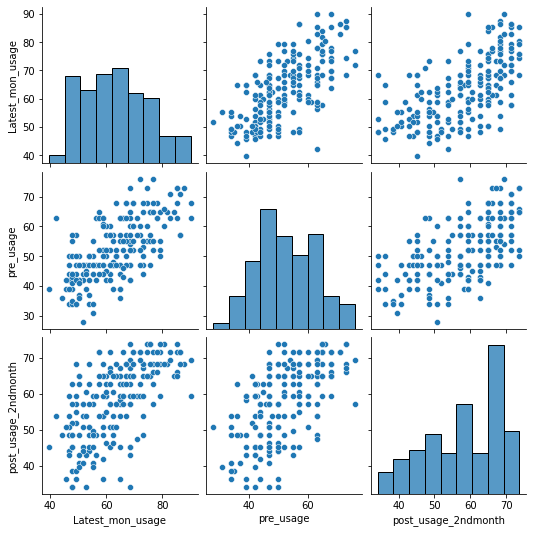

In [ ]:
# Check the shape of the data are normally distributed
df0=df[['Latest_mon_usage','pre_usage','post_usage_2ndmonth']]
sns.pairplot(df0);

normally distributed data are shaped like a bell, and none of the data shaped like a bell, so it's not linearly related.

In [ ]:
before=df.Latest_mon_usage
after=df.post_usage_2ndmonth

In [ ]:
# Using Shapiro Wilk test to check normality
stat, p=stats.shapiro(after)
print('Shapiro Wilk: %0.3f'%(stat))
print('P-value: %0.3f'%(p))

Shapiro Wilk: 0.947
P-value: 0.000


Nilai statistik dari uji shapiro adalah sebesar 0.947 dan nilai p-valuenya adalah sebesar 0.000.
Dengan H0 dari uji normalitas adalah data berdistribusi normal dan daerah kritisnya p-value < alpha adalah tolak H0 maka dari uji shapiro wilk diketahui p-value (0.000) < alpha (0.05) sehingga H0 tertolak, sehingga data tidak berdistribusi normal.

In [ ]:
# Using Jarque-Bera test to check normality
stat, p=stats.jarque_bera(after)
print('P-value: %0.3f'%(p))

P-value: 0.002


Diketahui p-value dari uji normalitas jarque bera sebesar 0.002 maka data yang ada menolak H0 karena p-value < alpha., artinya data sesudah campaign tidak berdistribusi normal.

In [ ]:
# Using Pearson's Correlation Coefficient test to find linear correlation
stat, p=stats.pearsonr(before,after)
print('PearsonR Correlation Coefficient: %0.3f'%(stat))
print('P-value: %0.3f'%(p))

PearsonR Correlation Coefficient: 0.617
P-value: 0.000


Diketahui bahwa nilai statistik dari uji korelasi pearson adalah sebesar 0.617 dan nilai p-valuenya adalah sebesar 0.000
Dengan H0 dari uji korelasi adalah data independen (tidak berkorelasi) dan daerah kritisnya p-value < alpha adalah tolak H0 maka dari uji pearson diketahui p-value (0.000) < alpha (0.05) sehingga H0 tertolak, artinya data sebelum campaign dengan sesudah campaign tidak berkorelasi.

In [ ]:
# Using Spearman's Rank Correlation Coefficient test to find linear correlation
stat, p=stats.spearmanr(before,after)
print("Spearman's Rank Correlation Coefficient: %0.3f"%(stat))
print('P-value: %0.3f'%(p))

Spearman's Rank Correlation Coefficient: 0.644
P-value: 0.000


Dari hasil p-value uji spearman diketahui juga nilainya H0 ditolak, artinya data tidak saling berkorelasi.